In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RESULTS_DIR = 'results'

dataset_types = ['random', 'reversed', 'almost_sorted']
algorithms = [
    'QuickSort', 'MergeSort', 'StringMergeSort',
    'TernaryStringQuickSort', 'MSDRadixSort', 'MSDRadixSortWithQuick'
]

In [3]:
colors = {
    'QuickSort': 'tab:blue',
    'MergeSort': 'tab:orange',
    'StringMergeSort': 'tab:green',
    'TernaryStringQuickSort': 'tab:red',
    'MSDRadixSort': 'tab:purple',
    'MSDRadixSortWithQuick': 'tab:brown'
}

def load_data(algorithm, dataset):
    filename = f"{algorithm}_{dataset}.csv"
    path = os.path.join(RESULTS_DIR, filename)
    if os.path.exists(path):
        return pd.read_csv(path)
    else:
        print(f"Warning: File not found: {path}")
        return None

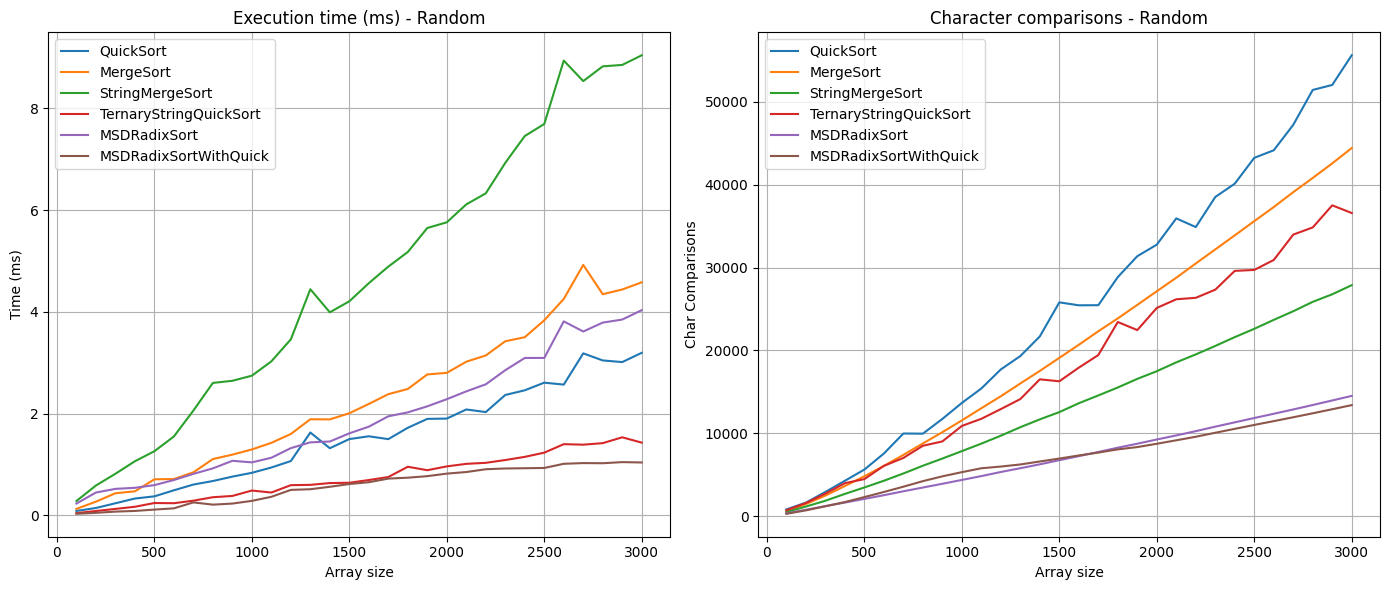

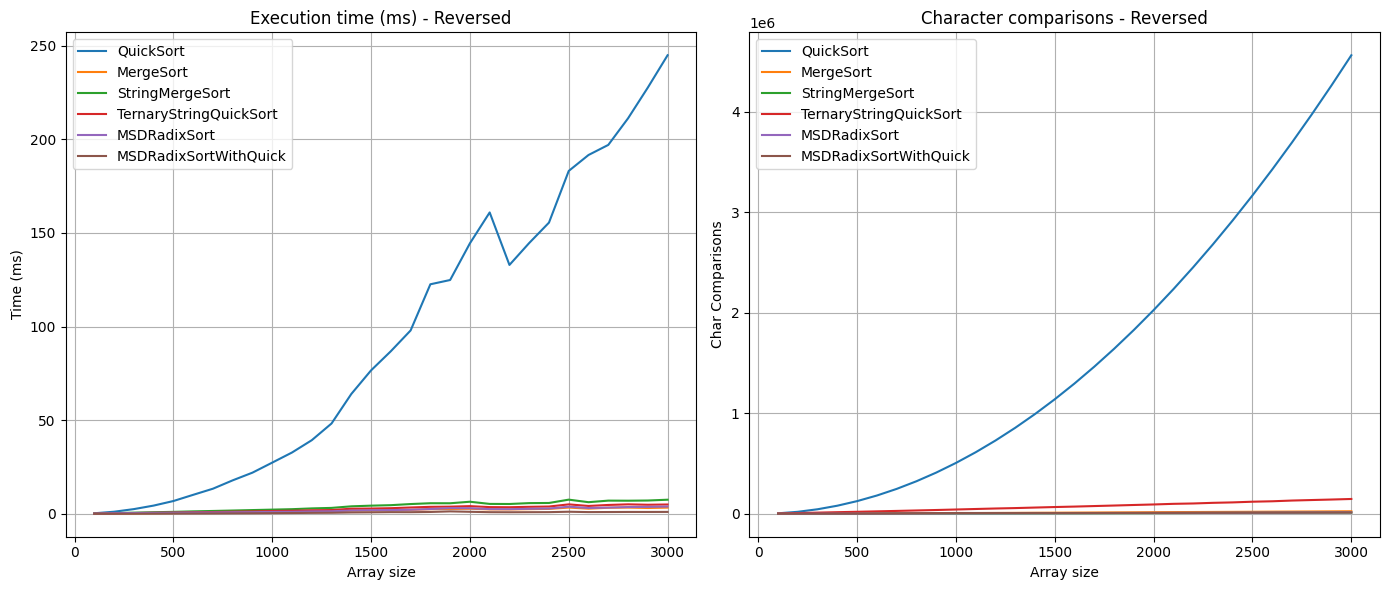

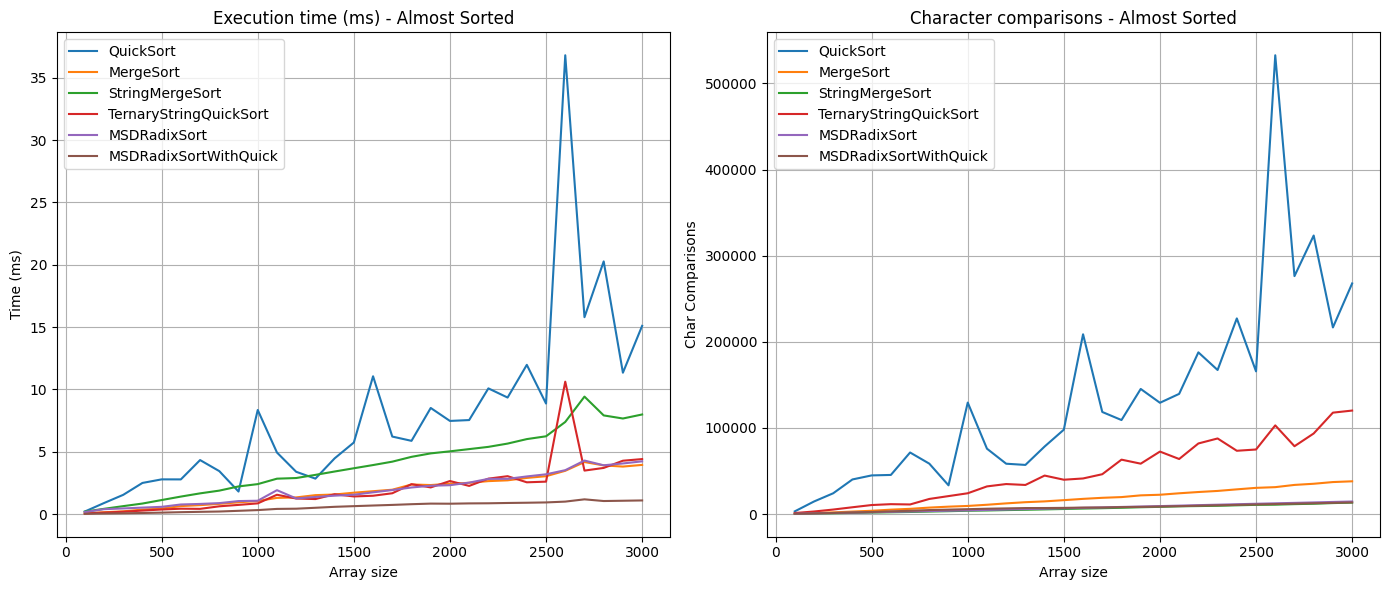

In [5]:
for dataset in dataset_types:
    plt.figure(figsize=(14, 6))
    
    # 2 subplot: время и сравнения
    plt.subplot(1, 2, 1)
    plt.title(f"Execution time (ms) - {dataset.replace('_', ' ').title()}")
    plt.xlabel("Array size")
    plt.ylabel("Time (ms)")
    
    plt.subplot(1, 2, 2)
    plt.title(f"Character comparisons - {dataset.replace('_', ' ').title()}")
    plt.xlabel("Array size")
    plt.ylabel("Char Comparisons")
    
    for algo in algorithms:
        df = load_data(algo, dataset)
        if df is None:
            continue
        
        sizes = df['Size']
        time_ms = df['AvgTime(ms)']
        cmp = df['AvgComparisons']
        
        plt.subplot(1, 2, 1)
        plt.plot(sizes, time_ms, label=algo, color=colors.get(algo, None))
        
        plt.subplot(1, 2, 2)
        plt.plot(sizes, cmp, label=algo, color=colors.get(algo, None))
    
    plt.subplot(1, 2, 1)
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()